In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    precision_score, recall_score, accuracy_score
)


In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target   

In [4]:
print("✅ Data loaded")
print(df.head())

✅ Data loaded
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \


In [5]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 455
Test size: 114


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
print("✅ Model trained")

✅ Model trained


In [10]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [11]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112



Confusion Matrix:


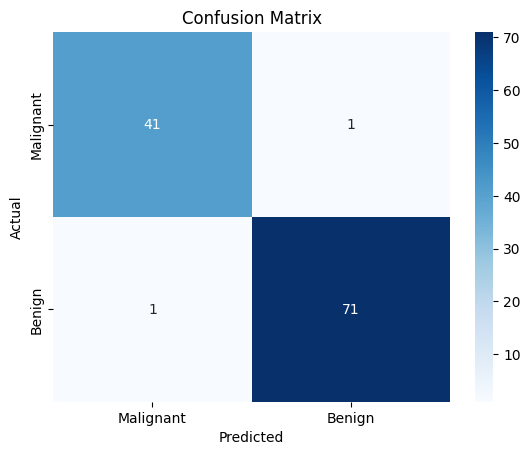

In [12]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant','Benign'], yticklabels=['Malignant','Benign'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [13]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [14]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

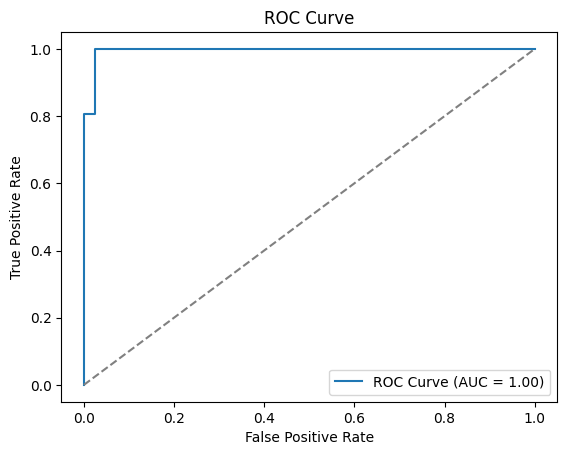

In [15]:
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [16]:
# Default threshold = 0.5
# Let's try 0.3 for higher recall
new_threshold = 0.3
y_pred_new = (y_proba >= new_threshold).astype(int)

In [17]:
print(f"\nWith threshold = {new_threshold}:")
print("Precision:", precision_score(y_test, y_pred_new))
print("Recall:", recall_score(y_test, y_pred_new))


With threshold = 0.3:
Precision: 0.972972972972973
Recall: 1.0


In [22]:
# Sigmoid function visualization
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

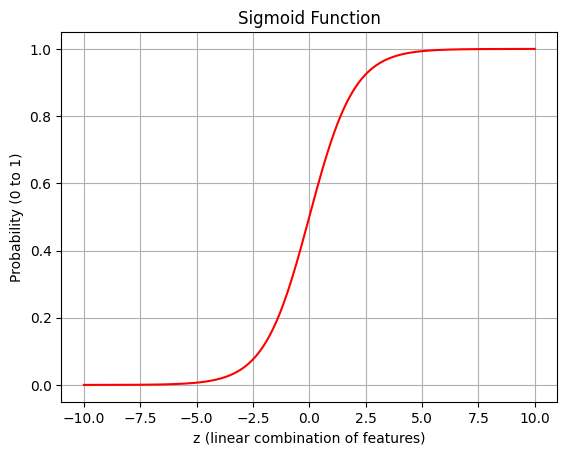

In [19]:
plt.plot(z, sigmoid, color='red')
plt.title("Sigmoid Function")
plt.xlabel("z (linear combination of features)")
plt.ylabel("Probability (0 to 1)")
plt.grid(True)
plt.show()

In [20]:
print("The sigmoid function maps any real number into [0,1], which makes it suitable for probability predictions in Logistic Regression.")

The sigmoid function maps any real number into [0,1], which makes it suitable for probability predictions in Logistic Regression.


In [21]:
print("Task completed") 

Task completed
